Given an unsorted array of A of size n of non negative integers find a continuous sub-array which adds to a given integer s

In [1]:
import pandas as pd

df = pd.read_csv("/content/theindianepresssFinal_Data.csv") #data from theindianexpress

In [2]:
df.describe()

,Title,Article_body,section_value
count,193,200,210
unique,121,126,4
top,"India vs South Africa, Cape Town Test: Lessons...",There’s a true story about a Delhi cricket adm...,Entertainment
freq,3,3,70


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          193 non-null    object
 1   Article_body   200 non-null    object
 2   section_value  210 non-null    object
dtypes: object(3)
memory usage: 5.0+ KB


In [4]:
df['section_value'].unique()

array(['Entertainment', 'Sports', 'World', 'Business'], dtype=object)

In [5]:
df.isnull().sum()

Title            17
Article_body     10
section_value     0
dtype: int64

In [6]:
#removing blank values
df_cleaned = df.dropna(subset=['Title', 'Article_body']).reset_index(drop=True)

In [7]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          191 non-null    object
 1   Article_body   191 non-null    object
 2   section_value  191 non-null    object
dtypes: object(3)
memory usage: 4.6+ KB


In [8]:
df_cleaned

,Title,Article_body,section_value
0,Salaar box office collection Day 13: Prabhas’ ...,The Prabhas-starrer Salaar has been playing in...,Entertainment
1,Khushi Kapoor says father Boney Kapoor cried a...,Sisters Janhvi Kapoor and Khushi Kapoor appear...,Entertainment
2,Janhvi Kapoor recalls ‘howling’ when she got t...,When veteran actor Sridevi passed away in Febr...,Entertainment
3,Deepika Padukone says she’s looking forward to...,Deepika Padukone has always said that she and ...,Entertainment
4,Janhvi Kapoor says boyfriend Shikhar Pahariya ...,Janhvi Kapoor and her sister Khushi Kapoor app...,Entertainment
...,...,...,...
186,Pat Cummins on the perfect farewell for David ...,All is in readiness for David Warner to take t...,Sports
187,India vs South Africa 2nd Test tip-off XI: Rav...,India vs South Africa 2nd Test: After a dismal...,Sports
188,"I’d change my technique to copy Virat Kohli, a...",South Africa’s David Bedingham reveals he used...,Sports
189,Two of the big questions for 2024: Rohit Sharm...,"It’s not about sentiments, to give Rohit Sharm...",Sports


In [9]:
df_no_duplicates = df_cleaned.drop_duplicates(keep='first')

In [10]:
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 0 to 157
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          128 non-null    object
 1   Article_body   128 non-null    object
 2   section_value  128 non-null    object
dtypes: object(3)
memory usage: 4.0+ KB


In [11]:
df_no_duplicates.describe()

,Title,Article_body,section_value
count,128,128,128
unique,120,120,4
top,"India vs South Africa, Cape Town Test: Lessons...",What’s the best thing to have happened to Indi...,World
freq,2,2,34


In [12]:
df_no_duplicates['section_value'].value_counts()

section_value
World            34
Sports           33
Business         31
Entertainment    30
Name: count, dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

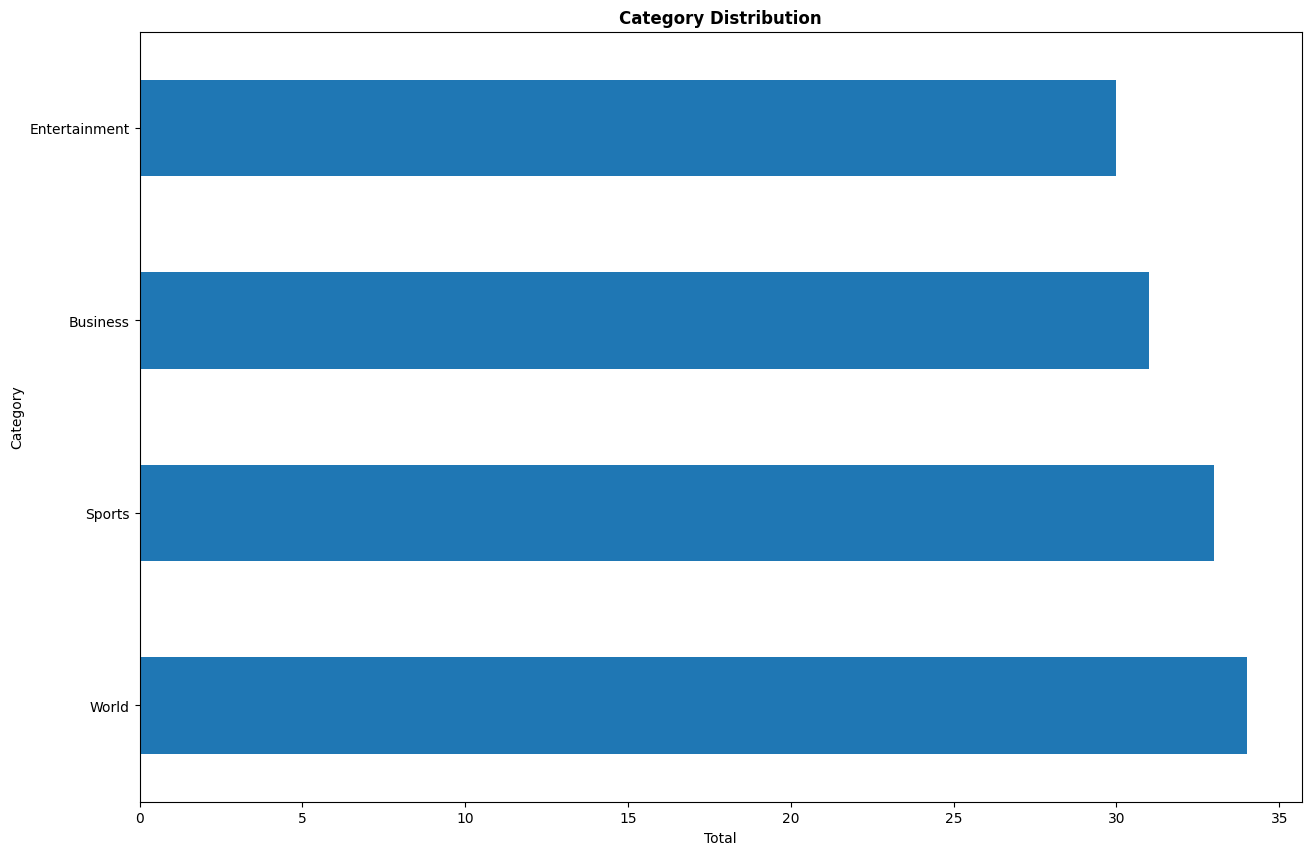

In [14]:
df_no_duplicates['section_value'].value_counts().plot(kind='barh', figsize=(15,10))
plt.xlabel("Total")
plt.ylabel("Category")
plt.title("Category Distribution",
          fontweight="bold", size=12);

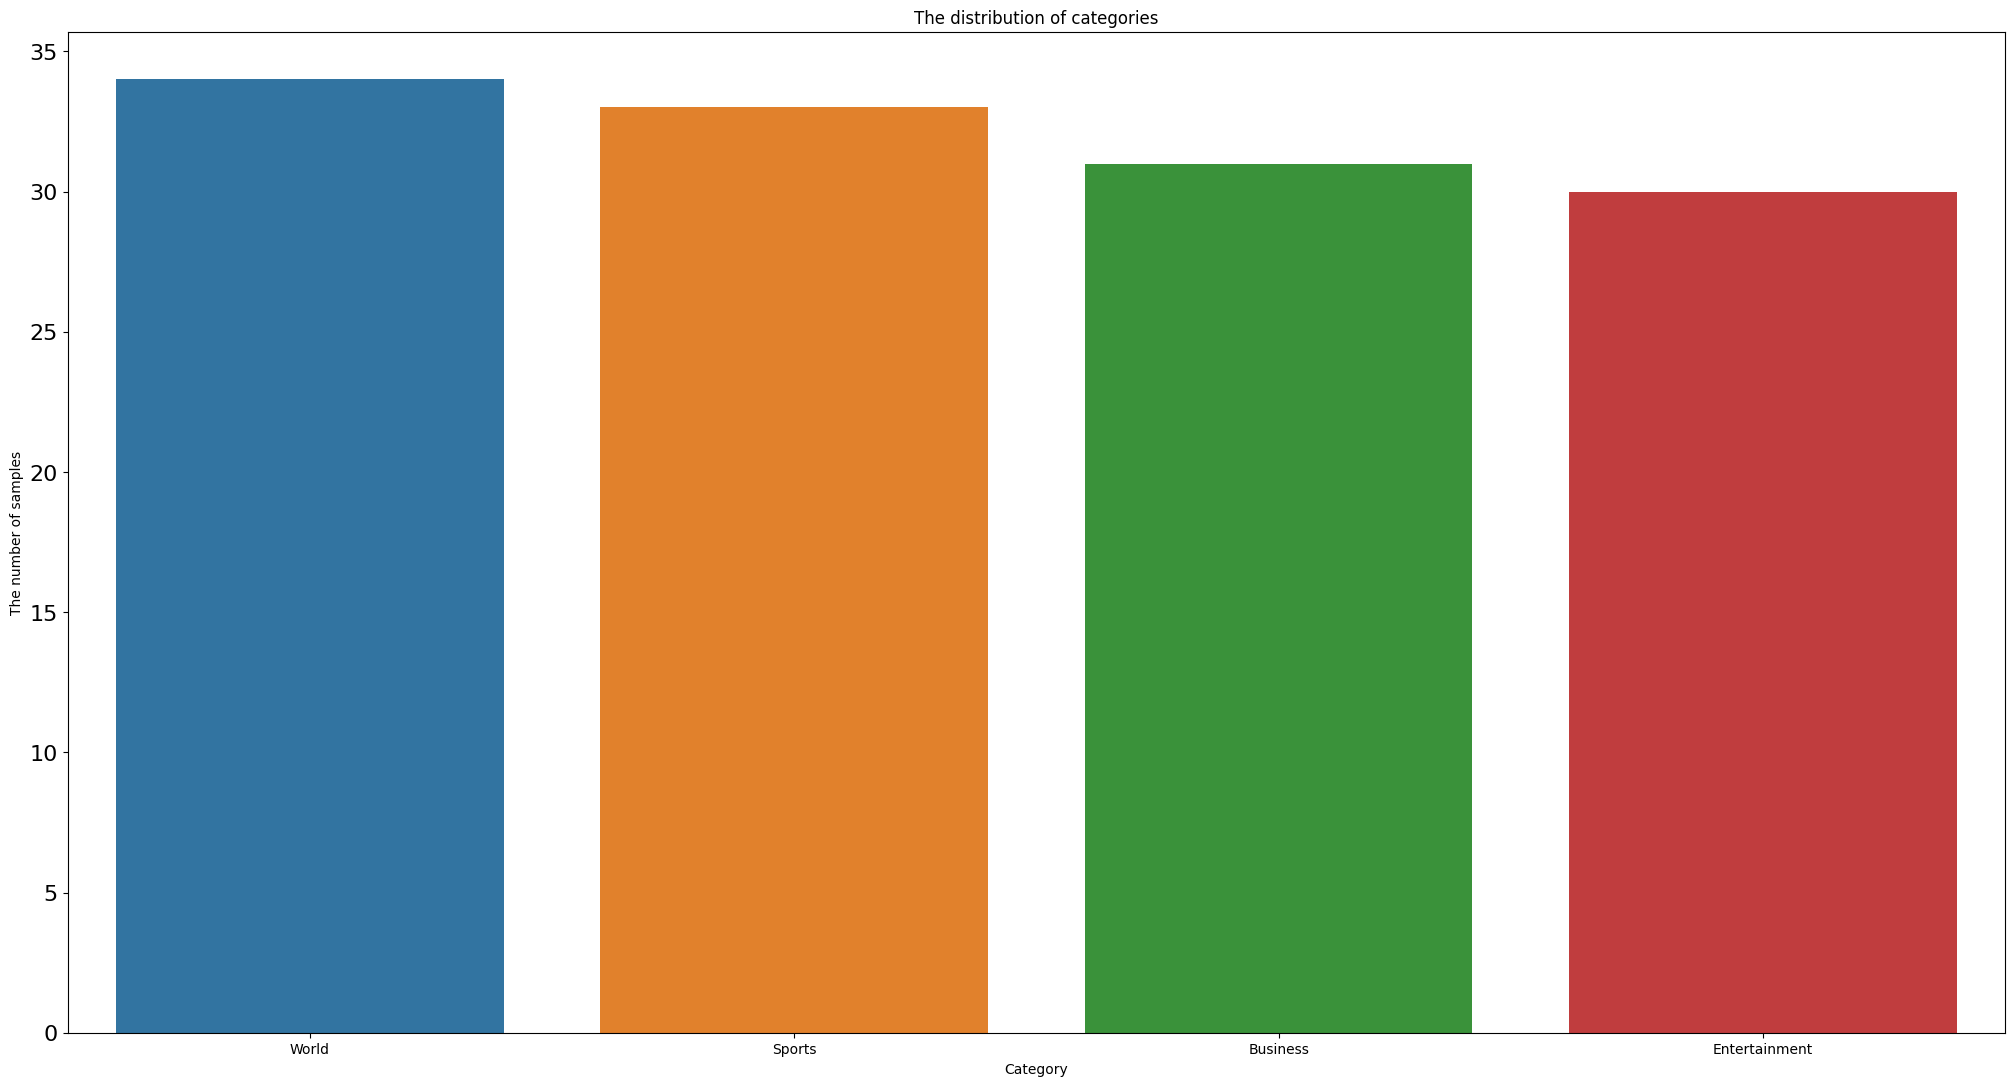

In [15]:
plt.figure(figsize=(25,13))
sns.barplot(y=df_no_duplicates['section_value'].value_counts().values,x=df_no_duplicates['section_value'].value_counts().index)
plt.title("The distribution of categories")
plt.xlabel("Category")
plt.ylabel("The number of samples")

plt.yticks(rotation=0,fontsize = 16)
plt.show()

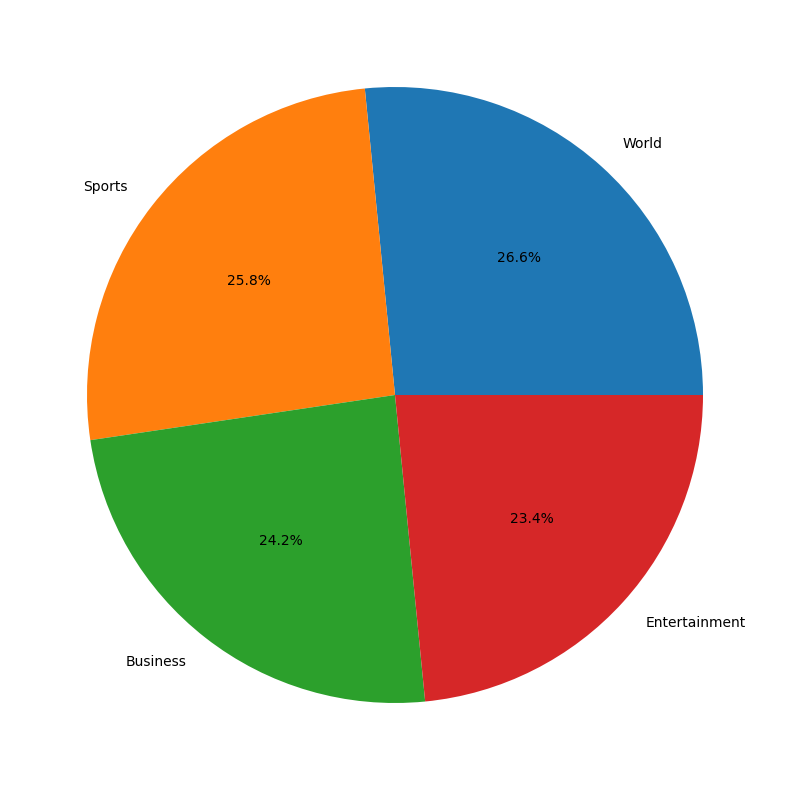

In [16]:
plt.figure(figsize=(10,10))
plt.pie(df_no_duplicates['section_value'].value_counts().values, autopct="%1.1f%%", labels=df_no_duplicates['section_value'].value_counts().index)
plt.show()

In [17]:
df_no_duplicates.loc[:, 'full_article'] = df_no_duplicates['Title'] + " " + df_no_duplicates['Article_body']
df_no_duplicates.head()

<ipython-input-17-96b4fd710df8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['full_article'] = df_no_duplicates['Title'] + " " + df_no_duplicates['Article_body']


,Title,Article_body,section_value,full_article
0,Salaar box office collection Day 13: Prabhas’ ...,The Prabhas-starrer Salaar has been playing in...,Entertainment,Salaar box office collection Day 13: Prabhas’ ...
1,Khushi Kapoor says father Boney Kapoor cried a...,Sisters Janhvi Kapoor and Khushi Kapoor appear...,Entertainment,Khushi Kapoor says father Boney Kapoor cried a...
2,Janhvi Kapoor recalls ‘howling’ when she got t...,When veteran actor Sridevi passed away in Febr...,Entertainment,Janhvi Kapoor recalls ‘howling’ when she got t...
3,Deepika Padukone says she’s looking forward to...,Deepika Padukone has always said that she and ...,Entertainment,Deepika Padukone says she’s looking forward to...
4,Janhvi Kapoor says boyfriend Shikhar Pahariya ...,Janhvi Kapoor and her sister Khushi Kapoor app...,Entertainment,Janhvi Kapoor says boyfriend Shikhar Pahariya ...


In [19]:
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [32]:
target_category = df_no_duplicates['section_value'].unique()
print(target_category)

df_no_duplicates['section_valueId'] = df_no_duplicates['section_value'].factorize()[0]
df_no_duplicates

['Entertainment' 'Sports' 'World' 'Business']


<ipython-input-32-353e1e582ffa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['section_valueId'] = df_no_duplicates['section_value'].factorize()[0]


,Title,Article_body,section_value,full_article,section_valueId
0,Salaar box office collection Day 13: Prabhas’ ...,The Prabhas-starrer Salaar has been playing in...,Entertainment,salaar box office collection day 13 prabhas bl...,0
1,Khushi Kapoor says father Boney Kapoor cried a...,Sisters Janhvi Kapoor and Khushi Kapoor appear...,Entertainment,khushi kapoor say father boney kapoor cried wa...,0
2,Janhvi Kapoor recalls ‘howling’ when she got t...,When veteran actor Sridevi passed away in Febr...,Entertainment,janhvi kapoor recall howling got call sridevi ...,0
3,Deepika Padukone says she’s looking forward to...,Deepika Padukone has always said that she and ...,Entertainment,deepika padukone say looking forward child ran...,0
4,Janhvi Kapoor says boyfriend Shikhar Pahariya ...,Janhvi Kapoor and her sister Khushi Kapoor app...,Entertainment,janhvi kapoor say boyfriend shikhar pahariya u...,0
...,...,...,...,...,...
153,Watch: Japan’s Nagaoka launches world’s larges...,As the clock struck midnight to welcome the Ne...,Business,watch japan nagaoka launch world largest firew...,3
154,"India vs South Africa, Cape Town Test: Lessons...",What’s the best thing to have happened to Indi...,Business,india v south africa cape town test lesson 23 ...,3
155,Sports maharajas and their fiefs,There’s a true story about a Delhi cricket adm...,Business,sport maharaja fief true story delhi cricket a...,3
156,India’s way forward: Services or manufacturing?,India is awash with discussions about where it...,Business,india way forward service manufacturing india ...,3


In [56]:
category = df_no_duplicates[['section_value', 'section_valueId']].drop_duplicates().sort_values('section_valueId')
print(category)

     section_value  section_valueId
0    Entertainment                0
60          Sports                1
93           World                2
127       Business                3


In [24]:
#Remove All Tags
def remove_tags(text):
    remove = re.compile(r'')
    return re.sub(remove, '', text)
df_no_duplicates.loc[:, 'full_article'] = df_no_duplicates['full_article'].apply(remove_tags)

In [23]:
#Remove Special Characters
def special_char(text):
    reviews = ''
    for x in text:
        if x.isalnum():
            reviews = reviews + x
        else:
            reviews = reviews + ' '
    return reviews
df_no_duplicates.loc[:, 'full_article'] = df_no_duplicates['full_article'].apply(special_char)

In [25]:
#Convert Everything in Lower Case

def convert_lower(text):
    return text.lower()

df_no_duplicates.loc[:, 'full_article'] = df_no_duplicates['full_article'].apply(convert_lower)
df_no_duplicates['full_article'][1]

'khushi kapoor says father boney kapoor cried after watching the archies  janhvi kapoor lists what her sister has in common with sridevi   my biases aside   sisters janhvi kapoor and khushi kapoor appeared as guests on the latest episode of koffee with karan  and they spoke candidly about their journey in the film business  khushi also spoke about her family s reaction to her debut movie  khushi kapoor  younger daughter of boney kapoor and sridevi  made her debut with zoya akhtar s the archies  the film released last month on netflix  and earned mixed reviews  during the episode  karan asked khushi about how she auditioned for the film   i had just come back from new york  and i had no intention of starting out at that point  so when i went and auditioned  i was fully shaking  it was the first office i went to  first audition i had ever given  so i was scared  she  zoya  made it really easy for me though  she calmed me down  i was freaking out  but i think it went well   khushi said  i

In [26]:
#Remove all Stopwords

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [x for x in words if x not in stop_words]
df_no_duplicates.loc[:, 'full_article'] = df_no_duplicates['full_article'].apply(remove_stopwords)
df_no_duplicates['full_article'][1]

['khushi',
 'kapoor',
 'says',
 'father',
 'boney',
 'kapoor',
 'cried',
 'watching',
 'archies',
 'janhvi',
 'kapoor',
 'lists',
 'sister',
 'common',
 'sridevi',
 'biases',
 'aside',
 'sisters',
 'janhvi',
 'kapoor',
 'khushi',
 'kapoor',
 'appeared',
 'guests',
 'latest',
 'episode',
 'koffee',
 'karan',
 'spoke',
 'candidly',
 'journey',
 'film',
 'business',
 'khushi',
 'also',
 'spoke',
 'family',
 'reaction',
 'debut',
 'movie',
 'khushi',
 'kapoor',
 'younger',
 'daughter',
 'boney',
 'kapoor',
 'sridevi',
 'made',
 'debut',
 'zoya',
 'akhtar',
 'archies',
 'film',
 'released',
 'last',
 'month',
 'netflix',
 'earned',
 'mixed',
 'reviews',
 'episode',
 'karan',
 'asked',
 'khushi',
 'auditioned',
 'film',
 'come',
 'back',
 'new',
 'york',
 'intention',
 'starting',
 'point',
 'went',
 'auditioned',
 'fully',
 'shaking',
 'first',
 'office',
 'went',
 'first',
 'audition',
 'ever',
 'given',
 'scared',
 'zoya',
 'made',
 'really',
 'easy',
 'though',
 'calmed',
 'freaking',
 '

In [27]:
#Lemmatizing the Words

def lemmatize_word(text):
    wordnet = WordNetLemmatizer()
    return " ".join([wordnet.lemmatize(word) for word in text])
df_no_duplicates.loc[:, 'full_article'] = df_no_duplicates['full_article'].apply(lemmatize_word)
df_no_duplicates['full_article'][1]

'khushi kapoor say father boney kapoor cried watching archies janhvi kapoor list sister common sridevi bias aside sister janhvi kapoor khushi kapoor appeared guest latest episode koffee karan spoke candidly journey film business khushi also spoke family reaction debut movie khushi kapoor younger daughter boney kapoor sridevi made debut zoya akhtar archies film released last month netflix earned mixed review episode karan asked khushi auditioned film come back new york intention starting point went auditioned fully shaking first office went first audition ever given scared zoya made really easy though calmed freaking think went well khushi said indian express entertainment whatsapp channel follow u latest news interview review photo landed coveted part betty cooper film khushi said immediately started howling cry knew wanted longest time moment felt okay happening zoya ideal situation got really emotional debutante revealed boney kapoor got emotional watching archies started cry janhvi 

In [33]:
##After Cleaning Text our Dataset
df_no_duplicates

,Title,Article_body,section_value,full_article,section_valueId
0,Salaar box office collection Day 13: Prabhas’ ...,The Prabhas-starrer Salaar has been playing in...,Entertainment,salaar box office collection day 13 prabhas bl...,0
1,Khushi Kapoor says father Boney Kapoor cried a...,Sisters Janhvi Kapoor and Khushi Kapoor appear...,Entertainment,khushi kapoor say father boney kapoor cried wa...,0
2,Janhvi Kapoor recalls ‘howling’ when she got t...,When veteran actor Sridevi passed away in Febr...,Entertainment,janhvi kapoor recall howling got call sridevi ...,0
3,Deepika Padukone says she’s looking forward to...,Deepika Padukone has always said that she and ...,Entertainment,deepika padukone say looking forward child ran...,0
4,Janhvi Kapoor says boyfriend Shikhar Pahariya ...,Janhvi Kapoor and her sister Khushi Kapoor app...,Entertainment,janhvi kapoor say boyfriend shikhar pahariya u...,0
...,...,...,...,...,...
153,Watch: Japan’s Nagaoka launches world’s larges...,As the clock struck midnight to welcome the Ne...,Business,watch japan nagaoka launch world largest firew...,3
154,"India vs South Africa, Cape Town Test: Lessons...",What’s the best thing to have happened to Indi...,Business,india v south africa cape town test lesson 23 ...,3
155,Sports maharajas and their fiefs,There’s a true story about a Delhi cricket adm...,Business,sport maharaja fief true story delhi cricket a...,3
156,India’s way forward: Services or manufacturing?,India is awash with discussions about where it...,Business,india way forward service manufacturing india ...,3


In [34]:
#Declared Dependent and Independent Value
x = df_no_duplicates['full_article']
y = df_no_duplicates['section_valueId']

In [36]:
df_no_duplicates.iloc[:,]

0      Salaar box office collection Day 13: Prabhas’ ...
1      Khushi Kapoor says father Boney Kapoor cried a...
2      Janhvi Kapoor recalls ‘howling’ when she got t...
3      Deepika Padukone says she’s looking forward to...
4      Janhvi Kapoor says boyfriend Shikhar Pahariya ...
                             ...                        
153    Watch: Japan’s Nagaoka launches world’s larges...
154    India vs South Africa, Cape Town Test: Lessons...
155                     Sports maharajas and their fiefs
156      India’s way forward: Services or manufacturing?
157    Who was Hamas leader Saleh al-Arouri, killed i...
Name: Title, Length: 128, dtype: object

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(df_no_duplicates.loc[:, 'full_article'].values)
y = np.array(df_no_duplicates.section_valueId.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(df_no_duplicates.full_article).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (128, 5000)
y.shape =  (128,)


In [41]:
#Train Test and Split the Dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

89
39


In [42]:
# Create list of model and accuracy dicts
perform_list = [ ]

In [51]:
def run_model(model_name, est_c, est_pnlty):
    mdl = ""
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=25)
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)
    elif model_name == 'Support Vector Classifer':
        mdl = SVC()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)
    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')
    print(f'F1-score : {f1score}')
    # Add performance parameters to list
    perform_list.append(dict([('Model', model_name),('Test Accuracy', round(accuracy, 2)),('Precision', round(precision, 2)),('Recall', round(recall, 2)),('F1', round(f1score, 2))]))

In [44]:
# Logistic Regression
run_model('Logistic Regression', est_c=None, est_pnlty=None)


Test Accuracy Score of Basic Logistic Regression: % 79.49
Precision : 0.7948717948717948
Recall : 0.7948717948717948
F1-score : 0.7948717948717948


In [52]:
#Random Forest
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 74.36
Precision : 0.7435897435897436
Recall : 0.7435897435897436
F1-score : 0.7435897435897437


In [46]:
# Multinomial Naive Bayes
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 71.79
Precision : 0.717948717948718
Recall : 0.717948717948718
F1-score : 0.717948717948718


In [47]:
#Support Vector Machine
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Support Vector Classifer: % 74.36
Precision : 0.7435897435897436
Recall : 0.7435897435897436
F1-score : 0.7435897435897437


In [48]:
#Decision Tree
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 58.97
Precision : 0.5897435897435898
Recall : 0.5897435897435898
F1-score : 0.5897435897435898


In [49]:
#KNN
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic K Nearest Neighbour: % 56.41
Precision : 0.5641025641025641
Recall : 0.5641025641025641
F1-score : 0.5641025641025641


In [50]:
#Gaussian Naive Bayes
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes: % 48.72
Precision : 0.48717948717948717
Recall : 0.48717948717948717
F1-score : 0.48717948717948717


In [53]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,79.49,0.79,0.79,0.79
1,Random Forest,76.92,0.77,0.77,0.77
2,Multinomial Naive Bayes,71.79,0.72,0.72,0.72
3,Support Vector Classifer,74.36,0.74,0.74,0.74
4,Decision Tree Classifier,58.97,0.59,0.59,0.59
5,K Nearest Neighbour,56.41,0.56,0.56,0.56
6,Gaussian Naive Bayes,48.72,0.49,0.49,0.49
7,Random Forest,74.36,0.74,0.74,0.74


In [64]:
lr_classifier = LogisticRegression(max_iter=1000).fit(x_train, y_train)
lr_classifier
y_pred_lr = lr_classifier.predict(x_test)

In [61]:
rf_classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(x_train, y_train)
rf_classifier
y_pred_rf = rf_classifier.predict(x_test)

In [67]:
y_pred1 = cv.transform(["""India Ratings and Research (Ind-Ra) has revised upwards India’s gross domestic product (GDP) growth estimate for FY24 to 6.7 per cent from earlier 6.2 per cent, citing a number of factors including the resilience of the Indian economy, which grew 7.6 per cent in the second quarter of FY24.”"""])
yy = rf_classifier.predict(y_pred1)
result = ""
if yy == [0]:
    result = "Entertainment"
elif yy == [1]:
    result = "Sports"
elif yy == [2]:
    result = "World"
elif yy == [3]:
    result = "Business"


print(result)

Business


In [73]:
joblib.dump(cv.vocabulary_, 'count_vectorizer.pkl')

['count_vectorizer.pkl']

In [71]:
import joblib

# Save the model to a file
joblib.dump(lr_classifier, 'TheIndianExpress-C4-logistic_regression_model.pkl')


['TheIndianExpress-C4-logistic_regression_model.pkl']

In [72]:
joblib.dump(rf_classifier, 'TheIndianExpress-C4-random_forest_model.pkl')

['TheIndianExpress-C4-random_forest_model.pkl']

In [75]:


# Load the model from the filoaded_lr_model = joblib.load('TheIndianExpress-C4-logistic_regression_model.pkl')

# Make predictions using the loaded model
y_pred_loaded = loaded_lr_model.predict(x_test)

print(y_pred_loaded)

[1 0 2 1 0 3 2 0 2 0 1 0 0 0 3 1 0 1 1 0 0 3 1 2 2 0 2 0 2 3 0 3 2 1 0 0 2
 1 0]
